# Load dataset

In [1]:
%run cp_dataset

Kiểm tra tập dữ liệu cho mô-đun khớp hình học!
Tổng độ dài của tập dữ liệu: 14221
Size of the dataset: 14221, dataloader: 3556
Python 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Type 'copyright', 'credits' or 'license' for more information
IPython 8.17.2 -- An enhanced Interactive Python. Type '?' for help.

In [1]: exit



# Load tensorboard của mô hình train_gmm gốc

In [1]:
#chạy tensorboard với 2 dữ liệu train
%load_ext tensorboard
%tensorboard --logdir tensorboard/GMM/gmm_1  --port 6071

# Load tensorboard của mô hình train_gmm đã custom

In [2]:
#chạy tensorboard với 3 dữ liệu train
%load_ext tensorboard
%tensorboard --logdir tensorboard/GMM/gmm_3 --port 6080

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Hàm thống kê dữ liệu tensorboard

In [46]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
from datetime import datetime

def analyze_tensorboard_logs(log_dir):
    # Khởi tạo event accumulator và tải dữ liệu từ thư mục log
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()

    # Lấy dữ liệu từ event accumulator
    tags = event_acc.Tags()['scalars']

    # Trích xuất thông tin loss
    losses = []
    steps = []
    wall_times = []
    for tag in tags:
        if 'loss' in tag:
            events = event_acc.Scalars(tag)
            losses += [event.value for event in events]
            steps = [event.step for event in events]
            wall_times = [event.wall_time for event in events]

    # Tính trung bình loss
    average_loss = sum(losses) / len(losses)

    # Tìm bước tốt nhất và thời gian tương ứng
    best_loss = min(losses)
    best_step = steps[losses.index(best_loss)]
    best_time = wall_times[losses.index(best_loss)]
    best_time_str = datetime.fromtimestamp(best_time).strftime('%Y-%m-%d %H:%M:%S')

    # Tìm bước tệ nhất và thời gian tương ứng
    worst_loss = max(losses)
    worst_step = steps[losses.index(worst_loss)]
    worst_time = wall_times[losses.index(worst_loss)]
    worst_time_str = datetime.fromtimestamp(worst_time).strftime('%Y-%m-%d %H:%M:%S')

    # Tạo biểu đồ loss
    plt.figure(figsize=(10, 6))
    plt.plot(steps, losses, label='Loss')
    plt.scatter(best_step, best_loss, color='red', marker='o', label='Best Loss')  # Thêm điểm cho kết quả tốt nhất
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Loss over steps')
    plt.legend()
    plt.grid(True)
    plt.show()

    # In ra kết quả
    print(f"Kết quả tốt nhất: Loss = {best_loss} tại bước thứ {best_step}")
    print(f"Thời gian: {best_time_str}")
    print(f"Kết quả tệ nhất: Loss = {worst_loss} tại bước thứ {worst_step}")
    print(f"Thời gian: {worst_time_str}")
    print(f"Trung bình loss: {average_loss}")



# load dữ liệu sao khi train 10k step của mô hình gốc

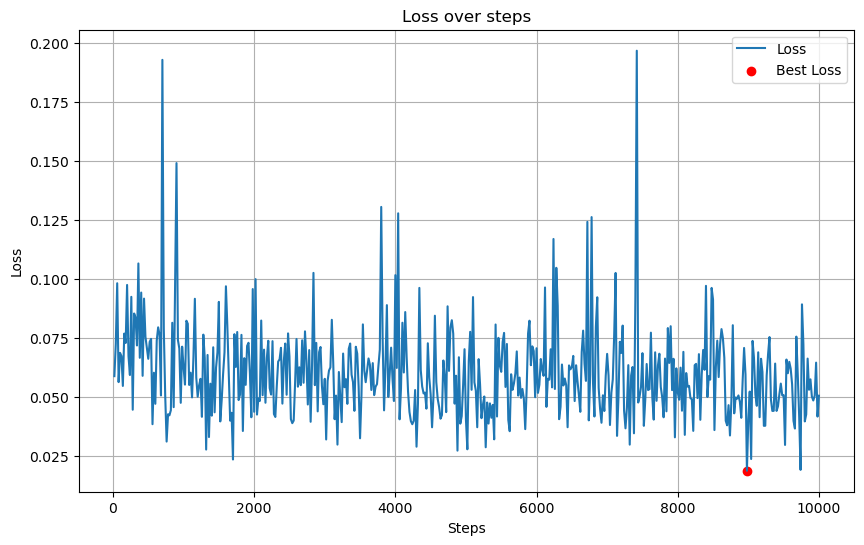

Kết quả tốt nhất: Loss = 0.018664482980966568 tại bước thứ 8980
Thời gian: 2023-11-11 13:03:55
Kết quả tệ nhất: Loss = 0.19662316143512726 tại bước thứ 7420
Thời gian: 2023-11-11 12:59:24
Trung bình loss: 0.05991128661483526


In [44]:
# thông kê tham số train gmm với model gốc 
LOG_DIR_1 = 'tensorboard/GMM/gmm_1'
analyze_tensorboard_logs(LOG_DIR_1)


# load dữ liệu sao khi train 10k step của mô hình đã custom

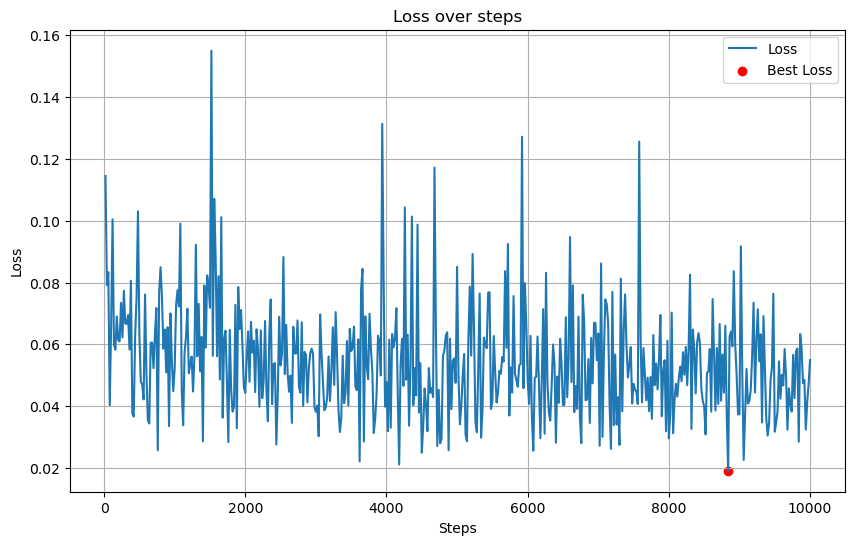

Kết quả tốt nhất: Loss = 0.019102664664387703 tại bước thứ 8840
Thời gian: 2023-11-11 14:39:06
Kết quả tệ nhất: Loss = 0.15501077473163605 tại bước thứ 1520
Thời gian: 2023-11-11 14:13:28
Trung bình loss: 0.05448554831370711


In [47]:
# thông kê tham số train gmm với model với dữ liệu đã custom
LOG_DIR_2 = 'tensorboard/GMM/gmm_3'
analyze_tensorboard_logs(LOG_DIR_2)


# hiển thị thử iou (còn lỗi)

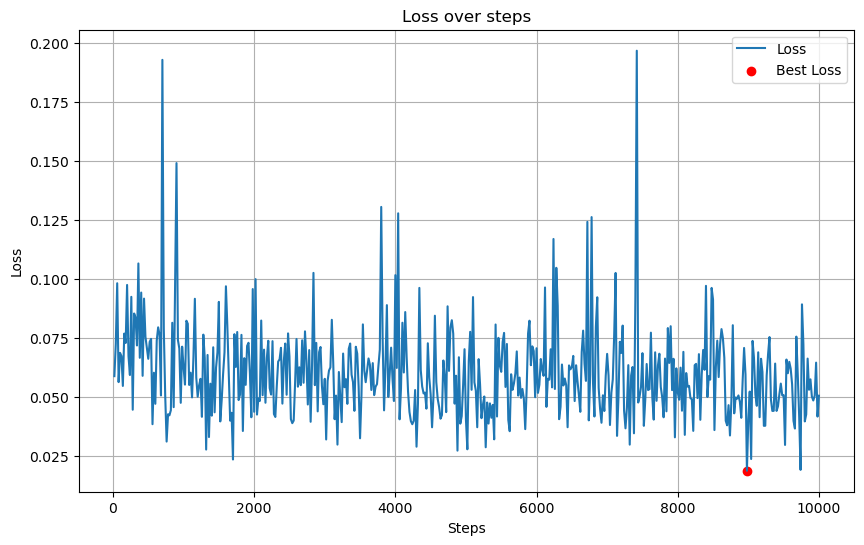

Kết quả tốt nhất: Loss = 0.018664482980966568 tại bước thứ 8980
Thời gian: 2023-11-11 13:03:55
Kết quả tệ nhất: Loss = 0.19662316143512726 tại bước thứ 7420
Thời gian: 2023-11-11 12:59:24
Kết quả trung bình IoU đạt được: 0.9400887133851648
Kết quả tốt với độ chồng lớn.


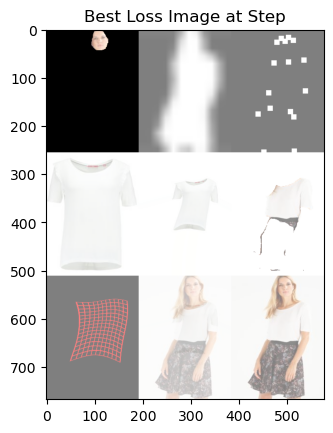

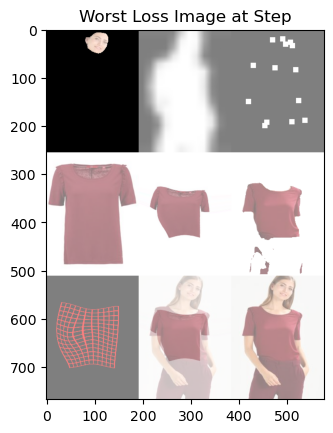

In [29]:
#in ra kêt qua dự đoán của mô hình góc

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
from datetime import datetime

# Đường dẫn đến folder log của TensorBoard
LOG_DIR = 'tensorboard/GMM/gmm_1'

event_acc = EventAccumulator(LOG_DIR)
event_acc.Reload()

# Lấy dữ liệu từ event accumulator
tags = event_acc.Tags()['scalars']

# Trích xuất thông tin loss
losses = []
steps = []
wall_times = []
for tag in tags:
    if 'loss' in tag:
        events = event_acc.Scalars(tag)
        losses = [event.value for event in events]
        steps = [event.step for event in events]
        wall_times = [event.wall_time for event in events]

# Tìm bước tốt nhất và thời gian tương ứng
best_loss = min(losses)
best_step = steps[losses.index(best_loss)]
best_time = wall_times[losses.index(best_loss)]
best_time_str = datetime.fromtimestamp(best_time).strftime('%Y-%m-%d %H:%M:%S')

# Tìm bước tệ nhất và thời gian tương ứng
worst_loss = max(losses)
worst_step = steps[losses.index(worst_loss)]
worst_time = wall_times[losses.index(worst_loss)]
worst_time_str = datetime.fromtimestamp(worst_time).strftime('%Y-%m-%d %H:%M:%S')

# Tính toán IoU dựa trên giá trị loss (giả định)
iou_values = [(1 - loss) for loss in losses]  # Ước lượng IoU dựa trên giá trị loss

# Tính toán giá trị trung bình IoU
average_iou = sum(iou_values) / len(iou_values)

# Thêm giá trị IoU vào danh sách
iou_values.append(average_iou)

# Vẽ sơ đồ loss
plt.figure(figsize=(10, 6))
plt.plot(steps, losses, label='Loss')
plt.scatter(best_step, best_loss, color='red', marker='o', label='Best Loss')  # Thêm điểm cho kết quả tốt nhất
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss over steps')
plt.legend()
plt.grid(True)
plt.show()

print(f"Kết quả tốt nhất: Loss = {best_loss} tại bước thứ {best_step}")
print(f"Thời gian: {best_time_str}")

print(f"Kết quả tệ nhất: Loss = {worst_loss} tại bước thứ {worst_step}")
print(f"Thời gian: {worst_time_str}")

# In ra kết quả trung bình IoU
print(f"Kết quả trung bình IoU đạt được: {average_iou}")

# Đánh giá dựa trên kết quả trung bình IoU
threshold_high_iou = 0.75
threshold_low_iou = 0.6

if average_iou >= threshold_high_iou:
    print("Kết quả tốt với độ chồng lớn.")
elif average_iou >= threshold_low_iou:
    print("Kết quả ổn định với độ chồng trung bình.")
else:
    print("Kết quả không tốt với độ chồng thấp.")
    
    
# Hiển thị ảnh tại bước tốt nhất
best_image_data = io.BytesIO(best_image_event.encoded_image_string)
best_img = plt.imread(best_image_data, format='jpg')
plt.imshow(best_img)
plt.title(f"Best Loss Image at Step")
plt.show()

# Hiển thị ảnh tại bước tệ nhất
worst_image_data = io.BytesIO(worst_image_event.encoded_image_string)
worst_img = plt.imread(worst_image_data, format='jpg')
plt.imshow(worst_img)
plt.title(f"Worst Loss Image at Step")
plt.show()


In [13]:
# tiến hành train 
%run train.py --name GMM --stage GMM --workers 4 --save_count 200 --shuffle

# in ra vài ảnh kết quả để dễ nhìn

Số lượng ảnh muốn hiển thị lớn hơn số lượng ảnh có sẵn trong sự kiện.


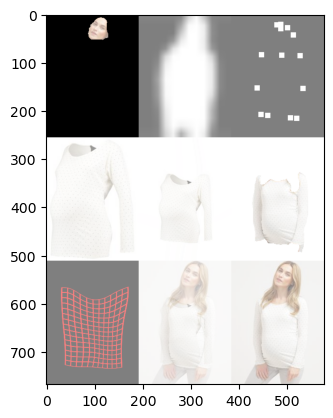

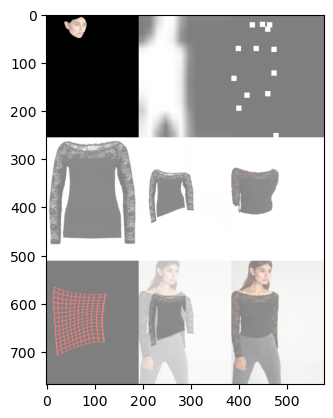

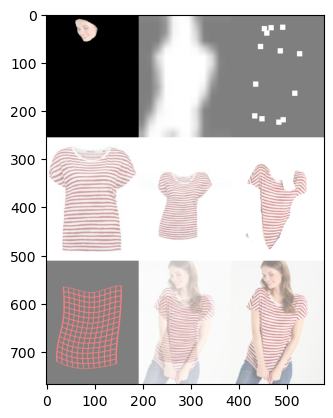

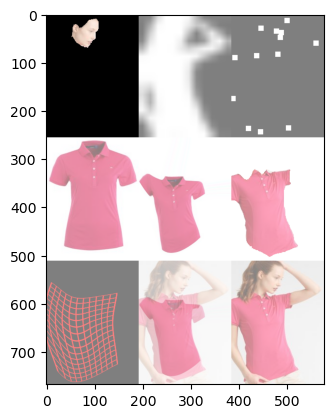

In [21]:
import tensorflow as tf
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
import random

# Đường dẫn đến folder log của TensorBoard
LOG_DIR = 'tensorboard/GMM/gmm_3'

event_acc = EventAccumulator(LOG_DIR)
event_acc.Reload()

# Lấy dữ liệu từ event accumulator
tags = event_acc.Tags()['images']

# Chọn một tag chứa ảnh (thay 'images' bằng tag cụ thể nếu có nhiều hơn một)
image_tag = tags[0]

# Lấy danh sách các ảnh từ event accumulator
image_events = event_acc.Images(image_tag)

# Chọn số lượng ảnh bạn muốn hiển thị
num_images_to_display = 10  # Thay đổi số lượng ảnh tùy ý

# Kiểm tra số lượng sự kiện có sẵn trong image_events
if num_images_to_display > len(image_events):
    print("Số lượng ảnh muốn hiển thị lớn hơn số lượng ảnh có sẵn trong sự kiện.")
    num_images_to_display = len(image_events)

# Chọn ngẫu nhiên các sự kiện để hiển thị
random_image_indices = random.sample(range(len(image_events)), num_images_to_display)

# Hiển thị các ảnh đã chọn
for image_index in random_image_indices:
    image_data = image_events[image_index].encoded_image_string
    image = tf.image.decode_image(image_data)
    plt.imshow(image)
    plt.show()
